In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [41]:
df = pd.read_csv("sample_data/Unemployment in India.csv")
# df1 = pd.read_csv("sample_data/Unemployment_Rate_upto_11_2020.csv")

In [42]:
df.columns = df.columns.str.strip()
df["Date"] = pd.to_datetime(df["Date"],dayfirst=True)
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [45]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaT,NaN,NaN,NaN,NaN,NaN
764,NaN,NaT,NaN,NaN,NaN,NaN,NaN
765,NaN,NaT,NaN,NaN,NaN,NaN,NaN
766,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [46]:
# Data cleaning and exploration

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB


In [49]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [51]:
df.duplicated().sum()

np.int64(0)

In [52]:
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


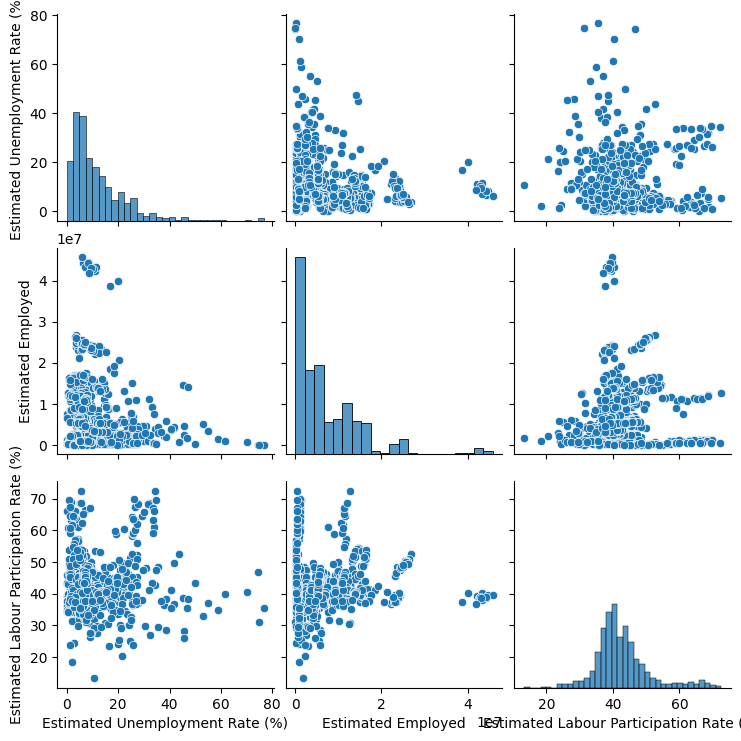

In [53]:
sns.pairplot(df)
plt.show()

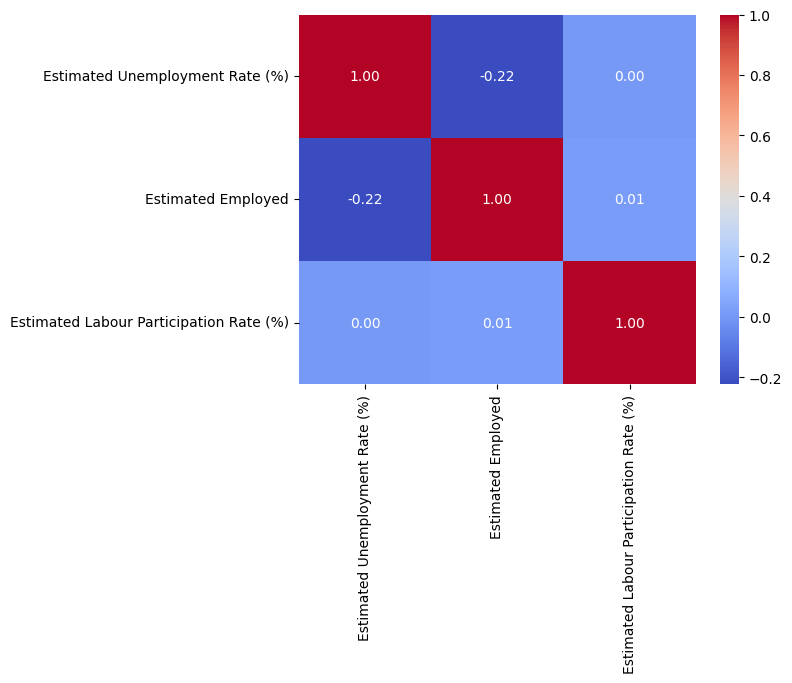

In [56]:
correlation_matrix = df.select_dtypes('number').corr()
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

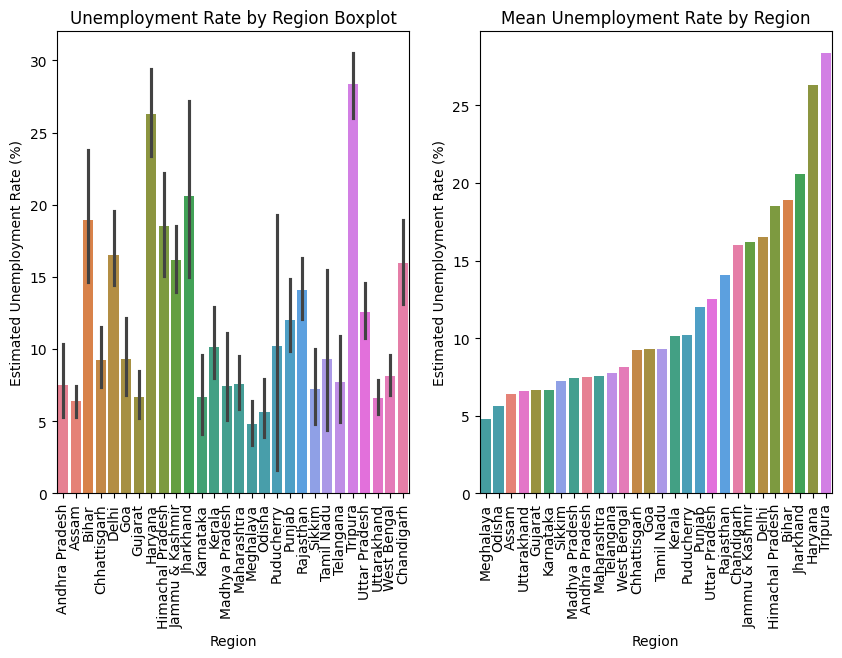

In [59]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.barplot(data=df,  x='Region', y='Estimated Unemployment Rate (%)',hue='Region')
plt.xticks(rotation='vertical')
plt.title("Unemployment Rate by Region Boxplot")

plt.subplot(1,2,2)
U_order = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values().index
sns.barplot(data=df, x='Region', y='Estimated Unemployment Rate (%)', order=U_order, hue="Region",errorbar=None)
plt.xticks(rotation='vertical')
plt.title("Mean Unemployment Rate by Region")
plt.show()

In [63]:
fig = px.sunburst(df, path=['Area', 'Region'], values='Estimated Unemployment Rate (%)', title='Unemployment Rate by Region and Area',width=600,height=600)

fig.show()

**Insights**


*   This sunburst plot shows that the unemployment rate is higher in the urban area. This is logical since jobs are concentrated in the urban area
*   The top 5 regions with the highest unemoployment rate are Tripure haryana jharkhand Bihar and Himachal Pradesh

This is visualization is a line plot that shows how all the feaures varied by time. The number of estimated workers is shown on a different plot on the right since it has an incredibilty larger scale than the other features



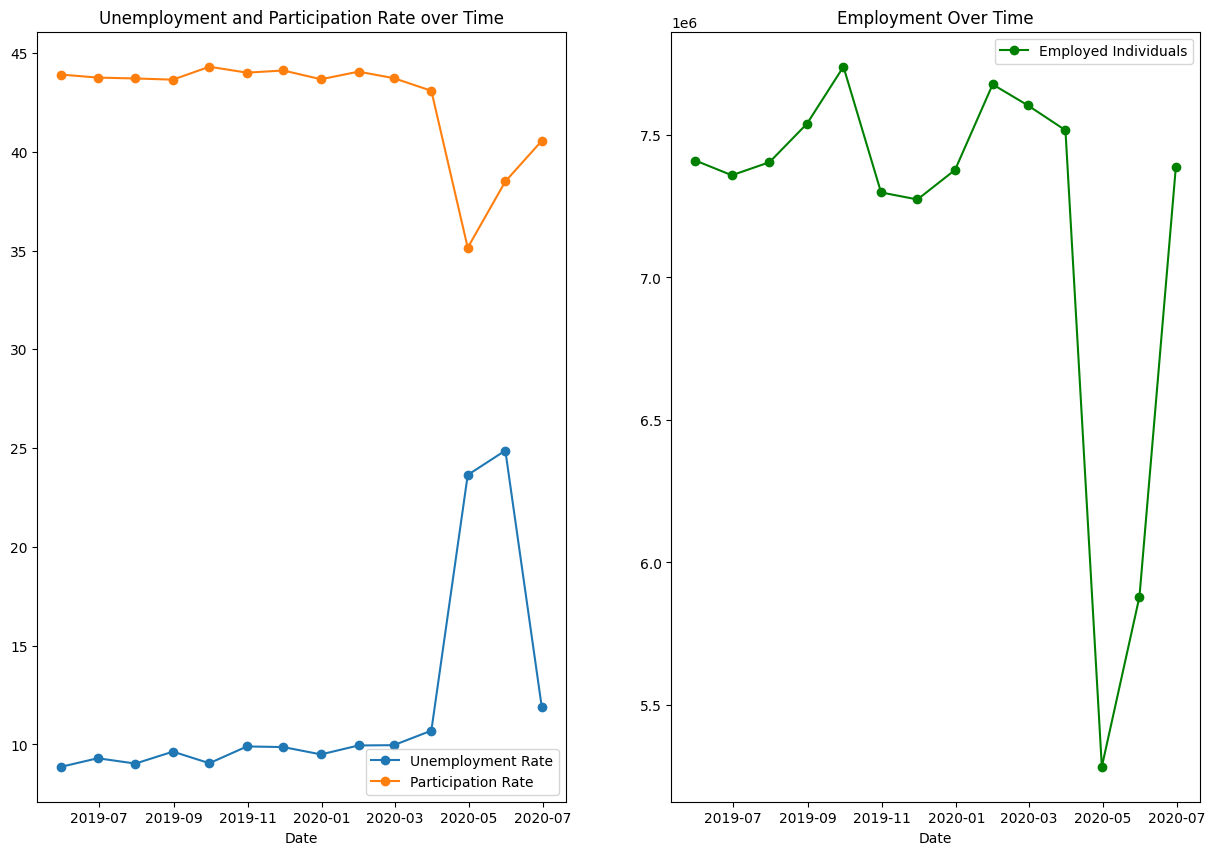

In [65]:
plt.figure(figsize=(15, 10))

# --- Left Plot: Unemployment vs Participation Rate ---
plt.subplot(1,2,1)
unemp_data = df.groupby("Date")['Estimated Unemployment Rate (%)'].mean()
plt.plot(unemp_data.index, unemp_data.values, marker='o', label='Unemployment Rate')

active = df.groupby("Date")['Estimated Labour Participation Rate (%)'].mean()
plt.plot(active.index, active.values, marker='o', label='Participation Rate')

plt.xlabel("Date")
plt.title("Unemployment and Participation Rate over Time")
plt.legend()

# --- Right Plot: Employment ---
plt.subplot(1,2,2)
emp_date = df.groupby("Date")['Estimated Employed'].mean()
plt.plot(emp_date.index, emp_date.values, marker='o', c='g', label='Employed Individuals')

plt.xlabel("Date")
plt.title("Employment Over Time")
plt.legend()

plt.show()


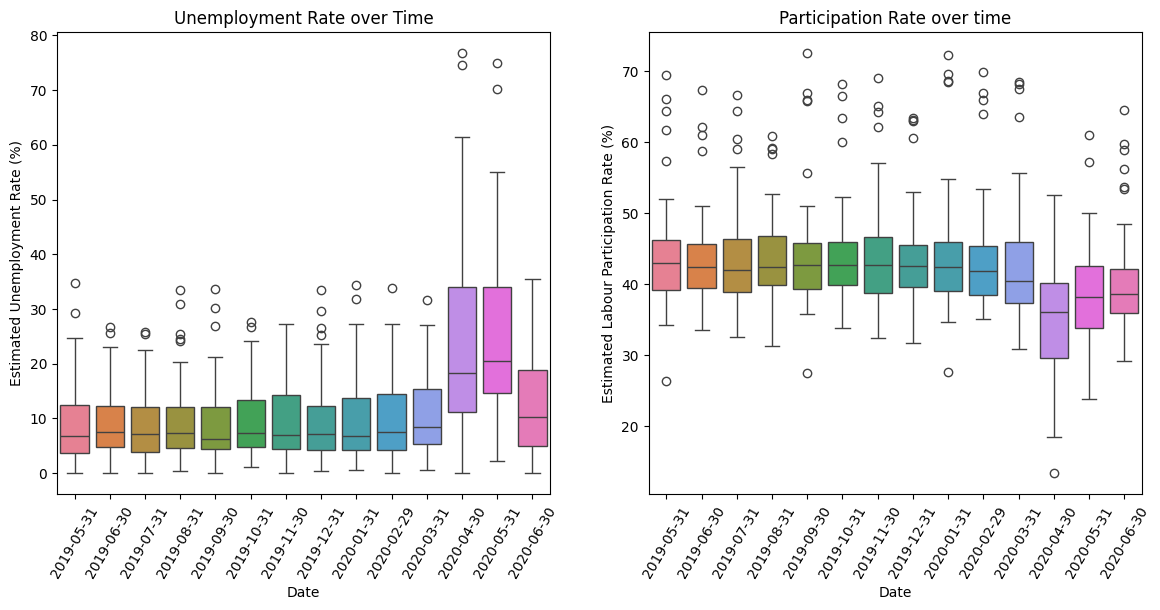

In [66]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Date')
plt.title("Unemployment Rate over Time")
plt.xticks(rotation=60)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Date', y='Estimated Labour Participation Rate (%)', hue='Date')
plt.xticks(rotation=60)
plt.title('Participation Rate over time')
plt.show()


In [67]:
df2 = pd.read_csv("sample_data/Unemployment_Rate_upto_11_2020.csv")
df2.columns = df2.columns.str.strip()
df2 = df2.rename(columns={"Region.1":"Area",'longitude':'latitude','latitude':'longitued'})
df2['Date'] = pd.to_datetime(df2['Date'],dayfirst=True)
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,latitude,longitued
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74


from matplotlib import pyplot as plt
_df_0['Estimated Unemployment Rate (%)'].plot(kind='hist', bins=20, title='Estimated Unemployment Rate (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Estimated Employed'].plot(kind='hist', bins=20, title='Estimated Employed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Estimated Labour Participation Rate (%)'].plot(kind='hist', bins=20, title='Estimated Labour Participation Rate (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Estimated Unemployment Rate (%)', y='Estimated Employed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Estimated Employed', y='Estimated Labour Participation Rate (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Estimated Unemployment Rate (%)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Estimated Unemployment Rate (%)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Estimated Employed']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Estimated Employed')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Estimated Labour Participation Rate (%)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Estimated Labour Participation Rate (%)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['Estimated Unemployment Rate (%)'].plot(kind='line', figsize=(8, 4), title='Estimated Unemployment Rate (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Estimated Employed'].plot(kind='line', figsize=(8, 4), title='Estimated Employed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Estimated Labour Participation Rate (%)'].plot(kind='line', figsize=(8, 4), title='Estimated Labour Participation Rate (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [71]:
df.duplicated().sum()

np.int64(0)

In [74]:
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


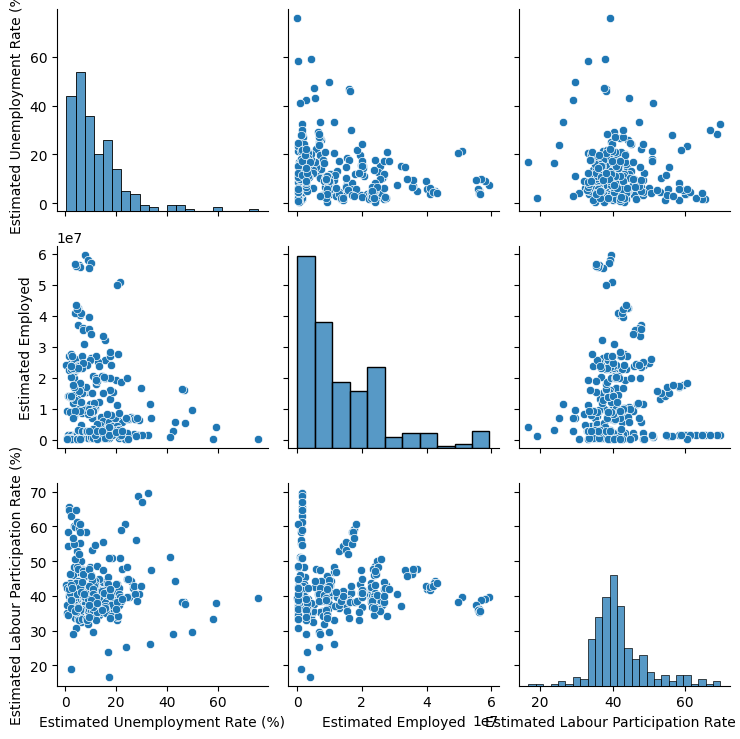

In [75]:
e_col = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']
sns.pairplot(df2[e_col])
plt.tight_layout()
plt.show()

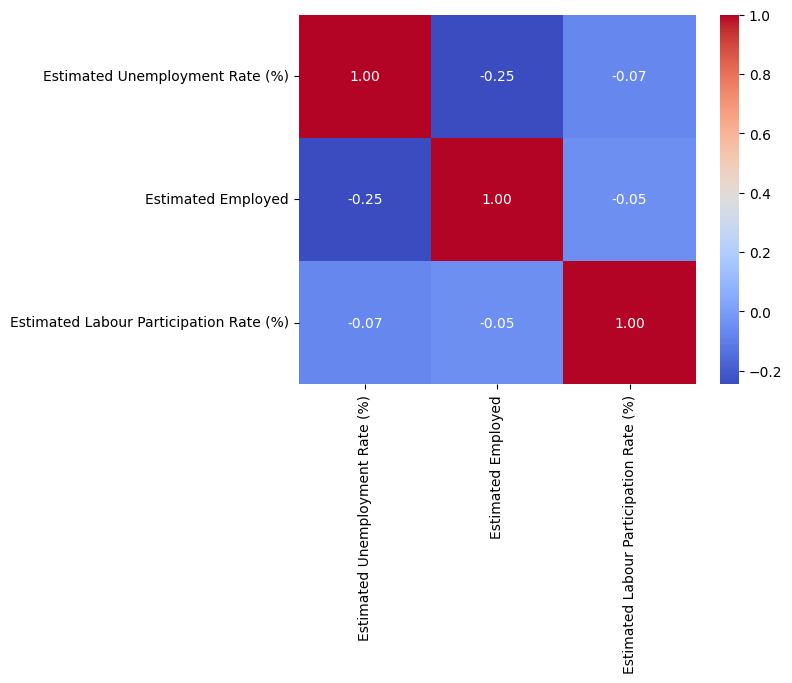

In [76]:
correlation_matrix = df2[e_col].corr()
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.show()

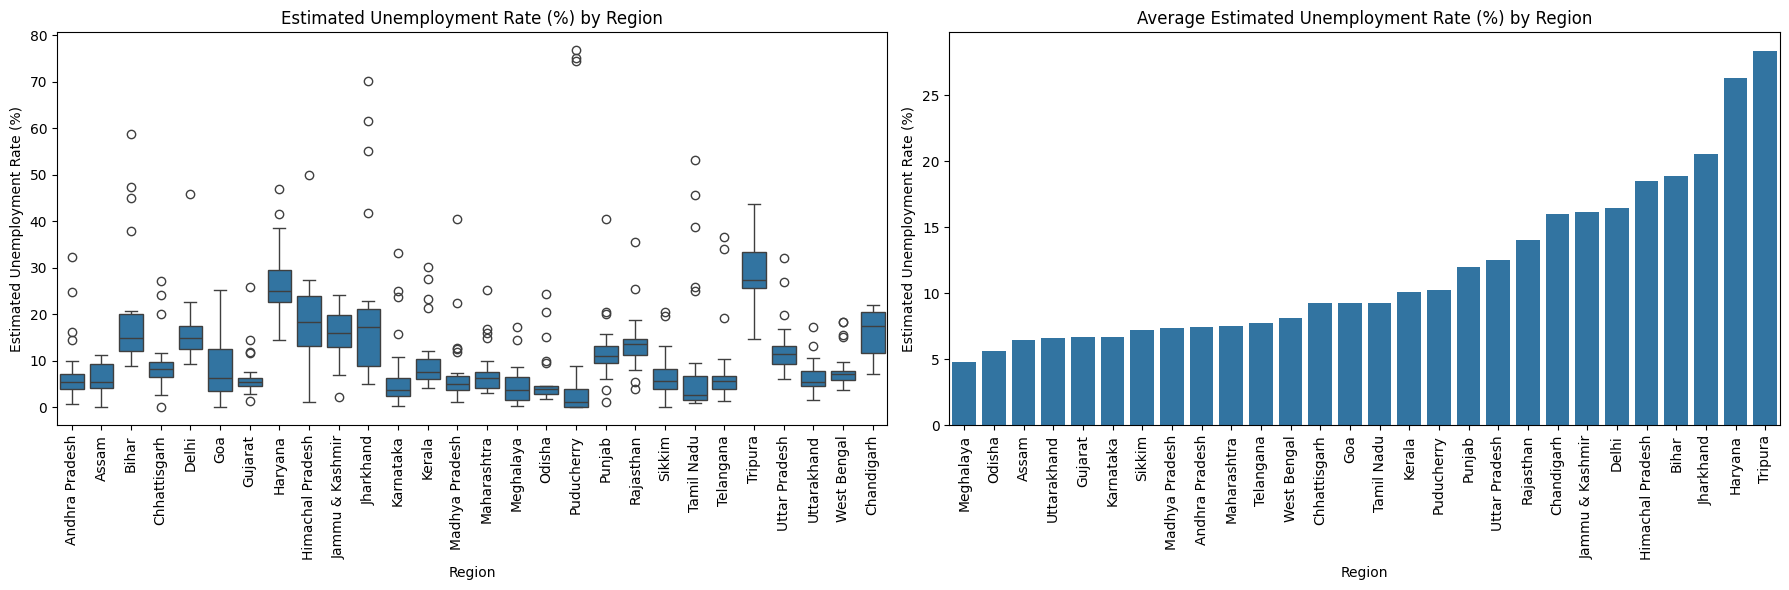

In [78]:
plt.figure(figsize=(18, 6))

# --- Left: Boxplot ---
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Region', y=e_col[0])
plt.title(f'{e_col[0]} by Region')
plt.xticks(rotation=90)

# --- Right: Ordered Barplot ---
plt.subplot(1,2,2)
ordered_stats = df.groupby('Region')[e_col[0]].mean().sort_values().reset_index()

sns.barplot(data=ordered_stats, x='Region', y=e_col[0], order=ordered_stats['Region'])
plt.title(f'Average {e_col[0]} by Region')
plt.xticks(rotation=90)
plt.legend([],[],frameon=False)  # legend remove

plt.tight_layout()
plt.show()

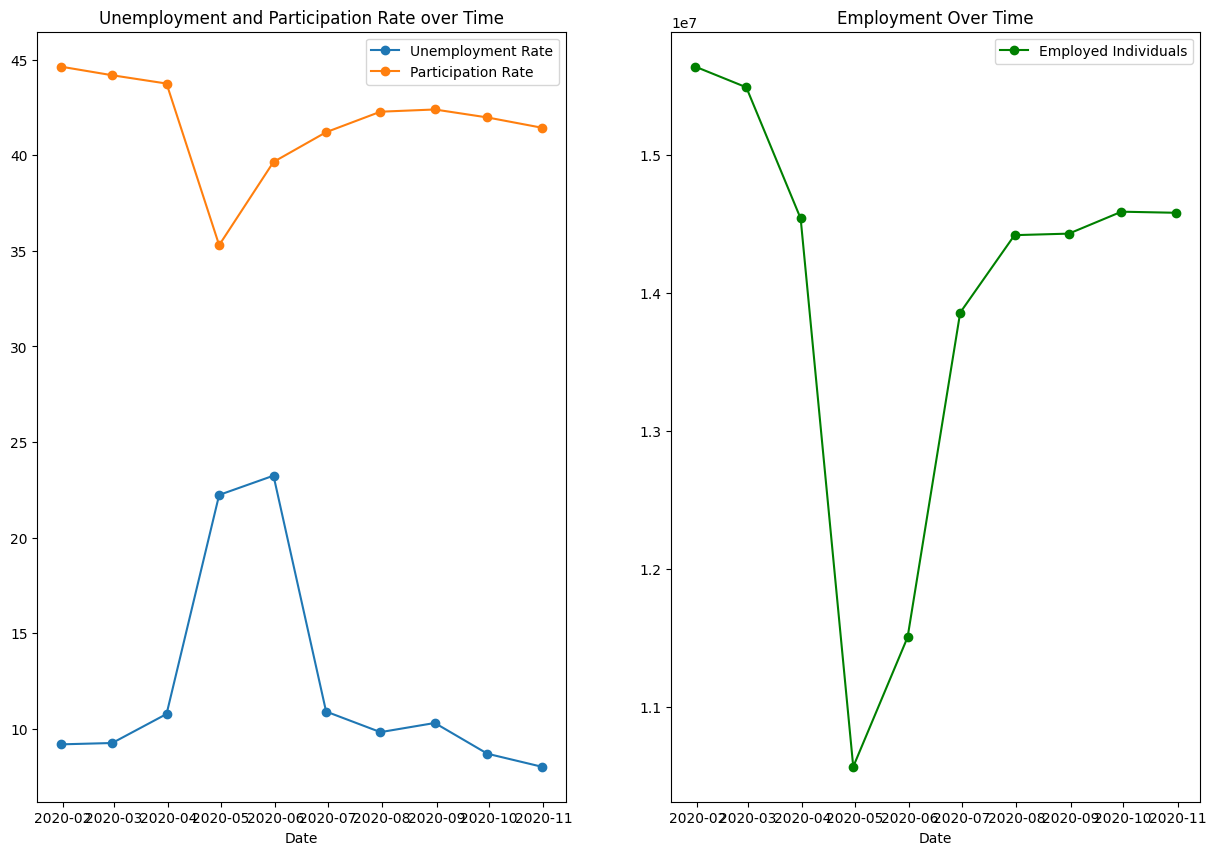

In [79]:
plt.figure(figsize=(15, 10))

# --- Left Plot: Unemployment vs Participation Rate ---
plt.subplot(1,2,1)
unemp_data = df2.groupby("Date")['Estimated Unemployment Rate (%)'].mean()
plt.plot(unemp_data.index, unemp_data.values, marker='o', label='Unemployment Rate')

active = df2.groupby("Date")['Estimated Labour Participation Rate (%)'].mean()
plt.plot(active.index, active.values, marker='o', label='Participation Rate')

plt.xlabel("Date")
plt.title("Unemployment and Participation Rate over Time")
plt.legend()

# --- Right Plot: Employment ---
plt.subplot(1,2,2)
emp_date = df2.groupby("Date")['Estimated Employed'].mean()
plt.plot(emp_date.index, emp_date.values, marker='o', c='g', label='Employed Individuals')

plt.xlabel("Date")
plt.title("Employment Over Time")
plt.legend()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

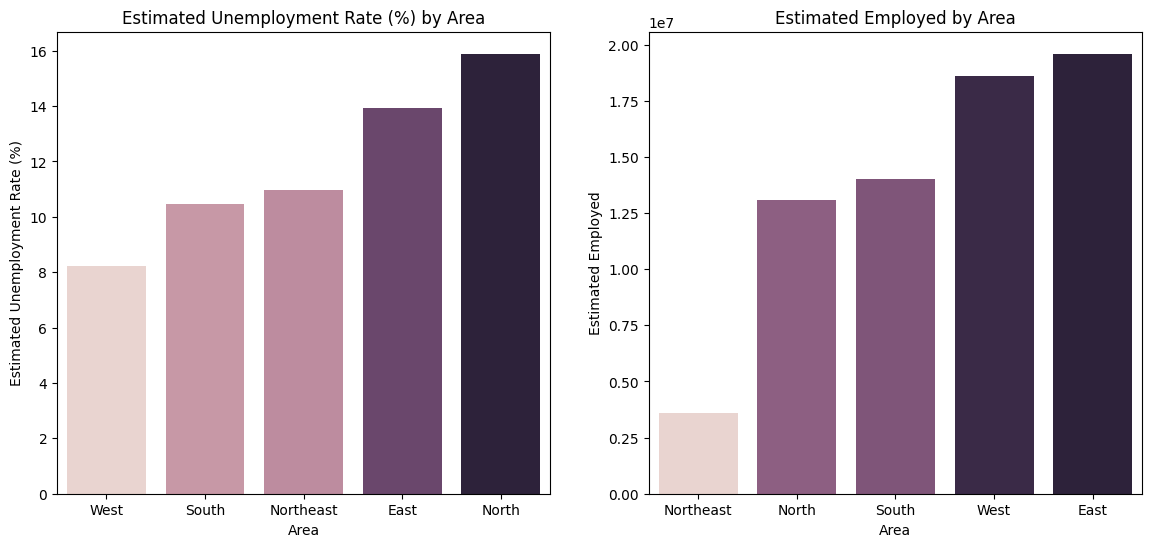

In [80]:
plt.figure(figsize=(14,6))
col=['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']
plt.subplot(1,2,1)
ordered_stats = df2.groupby('Area')[col[0]].mean().sort_values().reset_index()
sns.barplot(data=ordered_stats, x='Area', y=col[0], hue=col[0], errorbar=None)
plt.title("Estimated Unemployment Rate (%) by Area")
plt.legend([],[],frameon=False)
plt.subplot(1,2,2)
ordered_stats = df2.groupby('Area')[col[1]].mean().sort_values().reset_index()
sns.barplot(data=ordered_stats, x='Area', y=col[1], hue=col[1], errorbar=None)
plt.title("Estimated Employed by Area")
plt.legend([],[],frameon=False)
plt.show

In [81]:
fig = px.sunburst(df2, path=['Area', 'Region'], values='Estimated Unemployment Rate (%)', title='Unemployment Rate by Region and Area',width=600,height=600)

fig.show()

In [86]:


fig = px.scatter_geo(
    df2,
    lat="latitude",
    lon="longitued",
    color="Area",   # Rural vs Urban
    hover_name="Region",
    size="Estimated Unemployment Rate (%)",
    scope="asia",
    template="presentation",
    title="Employment by Regions",
    width=600,
    height=600
)

# Map customization
fig.update_geos(
    lataxis_range=[5, 35],
    lonaxis_range=[65, 100],
    oceancolor="skyblue",
    showocean=True
)

fig.show()


In [85]:
df2

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,latitude,longitued
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855


# **Comparing Data before and after lockdown**

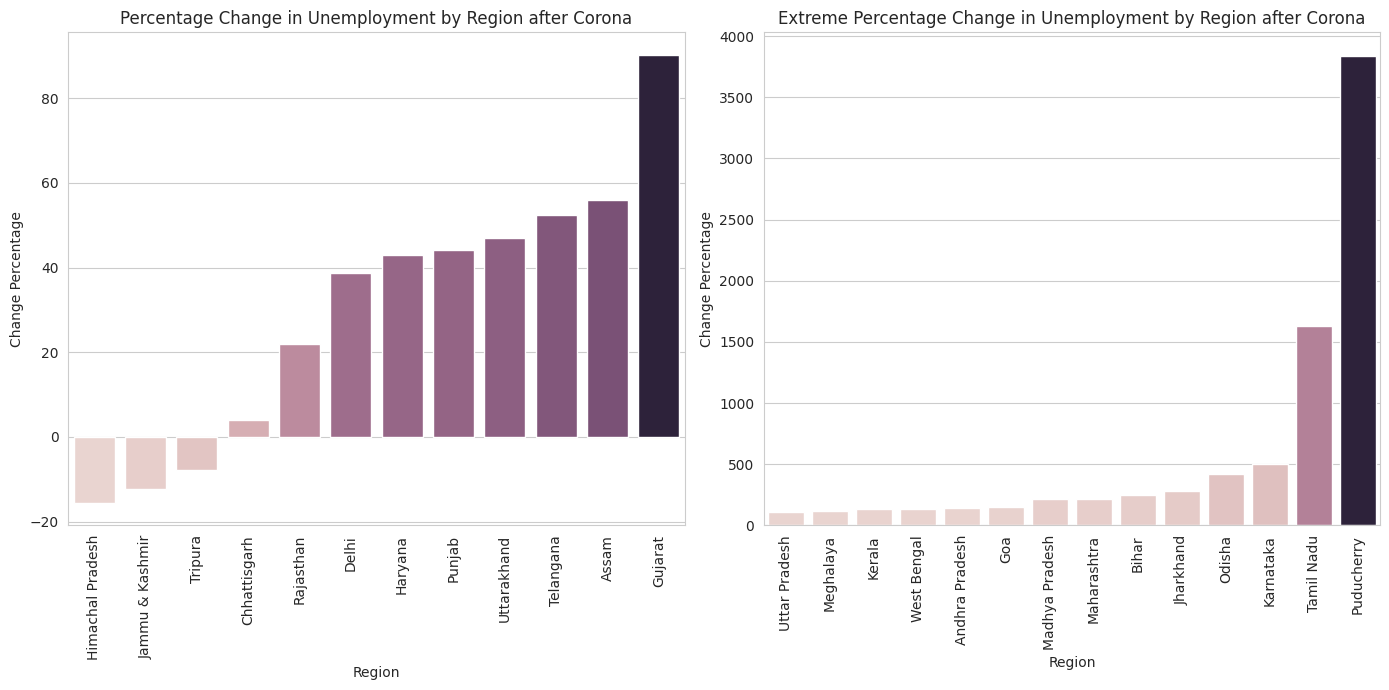

In [87]:
# Month column nikalna
df2['Month'] = df2['Date'].dt.month + 1

# Covid ke pehle ke months (Jan–Mar 2020, maan ke chalte hain)
bf_corona = df2[df2['Month'] < 4]

# Covid ke baad ke months (Apr–Jul 2020, ya aap data ke hisaab se set kar sakte ho)
af_corona = df2[(df2['Month'] > 4) & (df2['Month'] <= 7)]

# Average unemployment pehle aur baad
mean_bf_corona = bf_corona.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()
mean_af_corona = af_corona.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Merge dono
compare = pd.merge(mean_bf_corona, mean_af_corona, on='Region')
compare.columns = ['Region', 'Unemployment Rate before Corona', 'Unemployment Rate after Corona']

# Change percentage nikalna
compare['Change Percentage'] = round(((compare['Unemployment Rate after Corona'] - compare['Unemployment Rate before Corona']) / compare['Unemployment Rate before Corona']) * 100, 2)

# Sort karna
compare = compare.sort_values('Change Percentage')

# Normal vs Extreme cases split
normal = compare[compare['Change Percentage'] < 100]
extreme = compare[compare['Change Percentage'] >= 100]

# ---------------- Visualization ----------------
plt.figure(figsize=(14,7))
sns.set_style('whitegrid')

# Plot 1: Normal change
plt.subplot(1,2,1)
sns.barplot(data=normal, x='Region', y='Change Percentage', hue='Change Percentage', errorbar=None)
plt.title('Percentage Change in Unemployment by Region after Corona')
plt.legend([], [], frameon=False)   # legend remove
plt.xticks(rotation=90)

# Plot 2: Extreme change
plt.subplot(1,2,2)
sns.barplot(data=extreme, x='Region', y='Change Percentage', hue='Change Percentage', errorbar=None)
plt.title('Extreme Percentage Change in Unemployment by Region after Corona')
plt.legend([], [], frameon=False)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

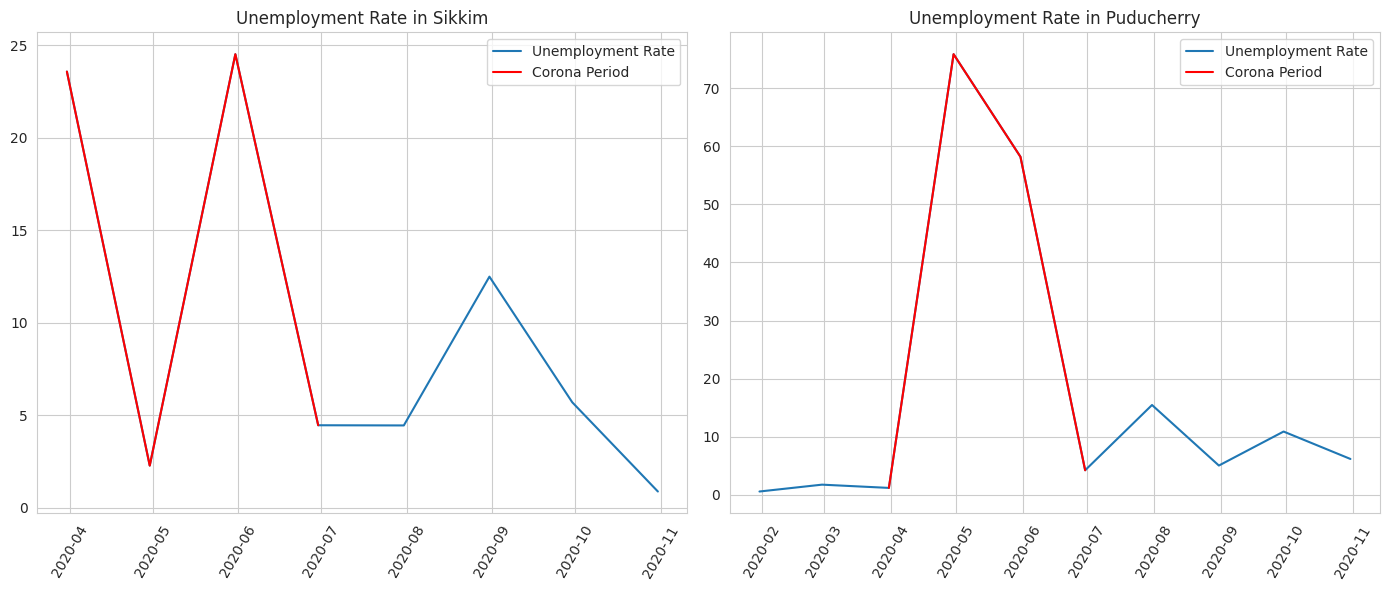

In [88]:
# Data subset for Sikkim
Sikkim = df2[df2['Region'] == 'Sikkim']
Sikkim_corona = Sikkim[(Sikkim['Month'] > 3) & (Sikkim['Month'] < 8)]

# Data subset for Puducherry
Puducherry = df2[df2['Region'] == 'Puducherry']
Puducherry_corona = Puducherry[(Puducherry['Month'] > 3) & (Puducherry['Month'] < 8)]

# ----------------- Visualization -----------------
plt.figure(figsize=(14,6))

# ---- Plot 1: Sikkim ----
plt.subplot(1,2,1)
plt.plot(Sikkim['Date'], Sikkim['Estimated Unemployment Rate (%)'], label='Unemployment Rate')
plt.plot(Sikkim_corona['Date'], Sikkim_corona['Estimated Unemployment Rate (%)'], c='r', label='Corona Period')
plt.title('Unemployment Rate in Sikkim')
plt.xticks(rotation=60)
plt.legend()

# ---- Plot 2: Puducherry ----
plt.subplot(1,2,2)
plt.plot(Puducherry['Date'], Puducherry['Estimated Unemployment Rate (%)'], label='Unemployment Rate')
plt.plot(Puducherry_corona['Date'], Puducherry_corona['Estimated Unemployment Rate (%)'], c='r', label='Corona Period')
plt.title('Unemployment Rate in Puducherry')
plt.xticks(rotation=60)
plt.legend()

plt.tight_layout()
plt.show()